In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical

import glob
import cv2 
import math

from scipy.linalg import svd
from numpy import linalg as LA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import os

%matplotlib inline

In [2]:
# Rading dataset
X = []
    
for folder in os.listdir('Emotion Dataset/'):
    
    for img in os.listdir('Emotion Dataset/' + str(folder)):
        
        n = cv2.imread('Emotion Dataset/' + str(folder) + '/' + str(img))
        gray = cv2.cvtColor(n,cv2.COLOR_BGR2GRAY)
        X.append(gray)

In [3]:
# Convert List dataset into array
X = np.array(X)
print(len(X))

5350


In [4]:
# ExpressionArray = ["Anger","Disgust","Fear","Happy","Neutral","Surprise","Sad"]

Y = np.zeros((len(X)))

i = 0

for folder in os.listdir('Emotion Dataset/'):
    
    for img in os.listdir('Emotion Dataset/' + str(folder)):
    
        if folder == "Anger": 
            Y[i]  = 0
        elif folder == "Disgust":
            Y[i]  = 1
        elif folder == "Fear":
            Y[i]  = 2
        elif folder == "Happy":
            Y[i]  = 3
        elif folder == "Neutral":
            Y[i]  = 4
        elif folder == "Sad":
            Y[i]  = 5
        elif folder == "Surprise":
            Y[i]  = 6
        
        i = i + 1


In [5]:
len(X),len(Y)

(5350, 5350)

In [6]:
Y

array([0., 0., 0., ..., 6., 6., 6.])

In [7]:

# Reading Annotation file of Emotion
# Emotion = pd.read_csv('D:/ML Dataset/Annotations/Train_Expression.txt', sep=" ", header=None)
# Emotion.columns = ["filename", "Emotion"]


In [8]:
dim = np.array([224, 224])

In [9]:
Y_one_hot = to_categorical(Y)

In [10]:
Y_one_hot,Y

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([0., 0., 0., ..., 6., 6., 6.]))

In [11]:
X = X.astype('float32')
X = X / 255

X = X.reshape(-1,dim[0],dim[1], 1)
X.shape

(5350, 224, 224, 1)

In [12]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X, Y_one_hot, test_size = 0.1, random_state = 13)
train_X.shape,test_X.shape,train_Y.shape,test_Y.shape

((4815, 224, 224, 1), (535, 224, 224, 1), (4815, 7), (535, 7))

In [13]:
train_X,valid_X,train_Y,valid_Y = train_test_split(train_X, train_Y, test_size = 0.2, random_state=13)
train_X.shape,valid_X.shape,train_Y.shape,valid_Y.shape

((3852, 224, 224, 1), (963, 224, 224, 1), (3852, 7), (963, 7))

In [14]:

# data = pd.read_csv('D:/ML Dataset/Annotations/Train_Roll_Number.txt', sep=" ", header=None)
# data1 = pd.read_csv('D:/ML Dataset/Annotations/Train_RGB_Sketch.txt', sep=" ", header=None)
# data2 = pd.read_csv('D:/ML Dataset/Annotations/Train_Gender.txt', sep=" ", header=None)
# data3 = pd.read_csv('D:/ML Dataset/Annotations/Train_Expression.txt', sep=" ", header=None)


In [15]:

# data.columns = ["filename", "subject"]
# data1.columns = ["filename", "sketch"]
# data2.columns = ["filename", "gender"]
# data3.columns = ["filename", "expression"]


# **Model the Data**

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 100
epochs = 60

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(dim[0],dim[1],1)))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(2048, activation='linear'))
model.add(Dropout(0.3))

model.add(Dense(1000, activation='linear'))
model.add(Dropout(0.3))

model.add(Dense(250, activation='linear'))
model.add(Dropout(0.3))

model.add(Dense(80, activation='linear'))          
model.add(Dropout(0.3))

model.add(Dense(15, activation='linear'))          
model.add(Dropout(0.3))


model.add(Dense(7, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 54, 54, 64)       

In [22]:
from tensorflow import keras

In [23]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
train_dropout = model.fit(train_X, train_Y, batch_size = 150, epochs = 60, verbose = 1, validation_data = (test_X, test_Y))

Epoch 1/60
26/26 [==============================] - 270s 10s/step - loss: 58.5749 - accuracy: 0.1638 - val_loss: 26.6082 - val_accuracy: 0.1570
Epoch 2/60
26/26 [==============================] - 239s 9s/step - loss: 4.8761 - accuracy: 0.1750 - val_loss: 9.8259 - val_accuracy: 0.1364
Epoch 3/60
26/26 [==============================] - 236s 9s/step - loss: 2.2342 - accuracy: 0.2370 - val_loss: 5.5354 - val_accuracy: 0.1271
Epoch 4/60
26/26 [==============================] - 243s 9s/step - loss: 2.0420 - accuracy: 0.2609 - val_loss: 5.9643 - val_accuracy: 0.1364
Epoch 5/60
26/26 [==============================] - 248s 10s/step - loss: 1.9350 - accuracy: 0.2947 - val_loss: 4.5017 - val_accuracy: 0.1477
Epoch 6/60
26/26 [==============================] - 233s 9s/step - loss: 1.9125 - accuracy: 0.3014 - val_loss: 2.1458 - val_accuracy: 0.3402
Epoch 7/60
26/26 [==============================] - 231s 9s/step - loss: 1.8968 - accuracy: 0.3126 - val_loss: 3.1877 - val_accuracy: 0.2187
Epoch 8/6

In [25]:
model.save("CNN_Emotion_model.h5")

In [26]:
test_eval = model.evaluate(test_X, test_Y, verbose=1)

17/17 [==============================] - 8s 458ms/step - loss: 2.5131 - accuracy: 0.4486


In [27]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.5131125450134277
Test accuracy: 0.44859811663627625


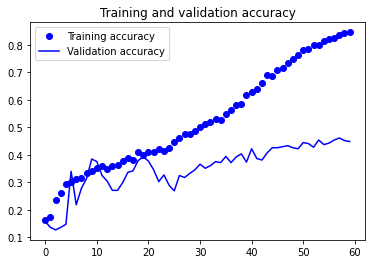

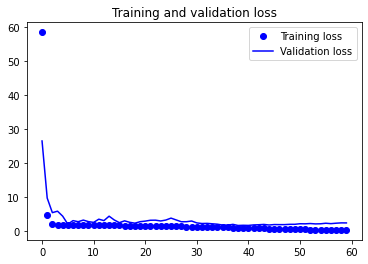

In [30]:
accuracy = train_dropout.history['accuracy']
val_accuracy = train_dropout.history['val_accuracy']
loss = train_dropout.history['loss']
val_loss = train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [31]:
predicted_classes = model.predict(test_X)

In [32]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [33]:
test_Y_Pre = np.argmax(np.round(test_Y),axis=1)

In [34]:
predicted_classes.shape, test_Y_Pre.shape

((535,), (535,))

Found 238 correct labels


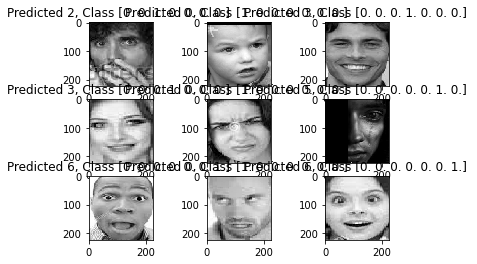

In [36]:
correct = np.where(predicted_classes==test_Y_Pre)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(dim[0],dim[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {} ".format(predicted_classes[correct], test_Y[correct]))

Found 297 incorrect labels


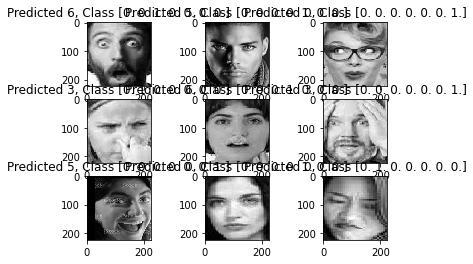

In [38]:
incorrect = np.where(predicted_classes!=test_Y_Pre)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(dim[0],dim[1]), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))

In [40]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(7)]
print(classification_report(test_Y_Pre, predicted_classes, target_names=target_names))
 

              precision    recall  f1-score   support

     Class 0       0.28      0.62      0.39        82
     Class 1       0.13      0.05      0.07        40
     Class 2       0.41      0.21      0.28        58
     Class 3       0.58      0.76      0.66       141
     Class 4       0.33      0.11      0.16        57
     Class 5       0.57      0.29      0.38        73
     Class 6       0.53      0.46      0.50        84

    accuracy                           0.44       535
   macro avg       0.41      0.36      0.35       535
weighted avg       0.45      0.44      0.42       535



# Pre - Processing

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout,Conv2D,MaxPooling2D,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this

IMAGE_SIZE = (224, 224)
path = "Emotion Dataset/"
data = []
c = 0
for folder in os.listdir(path):
    sub_path = path + "/" + folder
    
    for img in os.listdir(sub_path):
        image_path = sub_path + "/" + img        
        img_arr = cv2.imread(image_path)
        try:
          img_arr = cv2.resize(img_arr,IMAGE_SIZE)
          data.append(img_arr)
        except:
          c+=1
          continue

In [3]:
np.shape(data)

(5350, 224, 224, 3)

In [10]:
x = np.array(data)

x

array([[[[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [168, 168, 168],
         [168, 168, 168],
         [168, 168, 168]],

        [[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [168, 168, 168],
         [168, 168, 168],
         [168, 168, 168]],

        [[144, 144, 144],
         [144, 144, 144],
         [144, 144, 144],
         ...,
         [182, 182, 182],
         [182, 182, 182],
         [182, 182, 182]],

        ...,

        [[  3,   3,   3],
         [  3,   3,   3],
         [  3,   3,   3],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],

        [[  5,   5,   5],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [ 20,  20,  20],
         [ 20,  20,  20],
         [ 20,  20,  20]],

        [[  5,   5,   5],
         [  5,   5,   5],
         [  5,   5,   5],
         ...,
         [ 20,  20,  20],
        

In [11]:
datagen = ImageDataGenerator(rescale = 1./255)
dataset = datagen.flow_from_directory(path,
                                      target_size = IMAGE_SIZE,
                                      batch_size = 32,
                                      class_mode = 'sparse')

Found 5350 images belonging to 7 classes.


In [12]:
y = dataset.classes
y.shape

(5350,)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4280, 224, 224, 3) (4280,)
(1070, 224, 224, 3) (1070,)


# VGG - 16

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [16]:
base_model = VGG16(weights = "imagenet", include_top = False, input_shape = x_train[0].shape)
base_model.trainable = False ## Not trainable weights

In [17]:
## Preprocessing input

train_ds = preprocess_input(x_train) 
test_ds = preprocess_input(x_test)

In [18]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(7, activation='softmax')


model = models.Sequential([
    base_model,
    flatten_layer,+
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience = 5,  restore_best_weights = True)

model.fit(train_ds, y_train, epochs = 10, validation_split = 0.2, batch_size = 32, callbacks = [es])

Epoch 1/10
107/107 [==============================] - 840s 8s/step - loss: 2.4901 - accuracy: 0.2950 - val_loss: 1.8758 - val_accuracy: 0.3259
Epoch 2/10
107/107 [==============================] - 951s 9s/step - loss: 1.7045 - accuracy: 0.4109 - val_loss: 1.8042 - val_accuracy: 0.3692
Epoch 3/10
107/107 [==============================] - 1131s 11s/step - loss: 1.3224 - accuracy: 0.5044 - val_loss: 1.6950 - val_accuracy: 0.4054
Epoch 4/10
107/107 [==============================] - 1085s 10s/step - loss: 1.1273 - accuracy: 0.5555 - val_loss: 1.7058 - val_accuracy: 0.4100
Epoch 5/10
107/107 [==============================] - 1147s 11s/step - loss: 0.9689 - accuracy: 0.6040 - val_loss: 1.6420 - val_accuracy: 0.4393
Epoch 6/10
107/107 [==============================] - 981s 9s/step - loss: 0.8379 - accuracy: 0.6694 - val_loss: 1.6831 - val_accuracy: 0.4206
Epoch 7/10
